In [1]:
#linear algebra
import numpy as np
#data processing
import pandas as pd

#data vis
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


#ML algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')


train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
train_df.head(8)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)#concat on columns
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(train_df)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
Cabin                687               77.1
Age                  177               19.9
Embarked               2                0.2

In [6]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

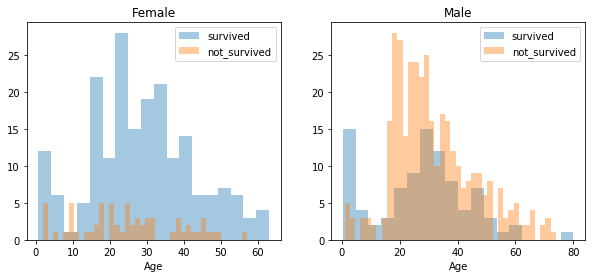

In [7]:
survived = 'survived'
not_survived = 'not_survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label= survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label= not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label= survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label= not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')

/home/karan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


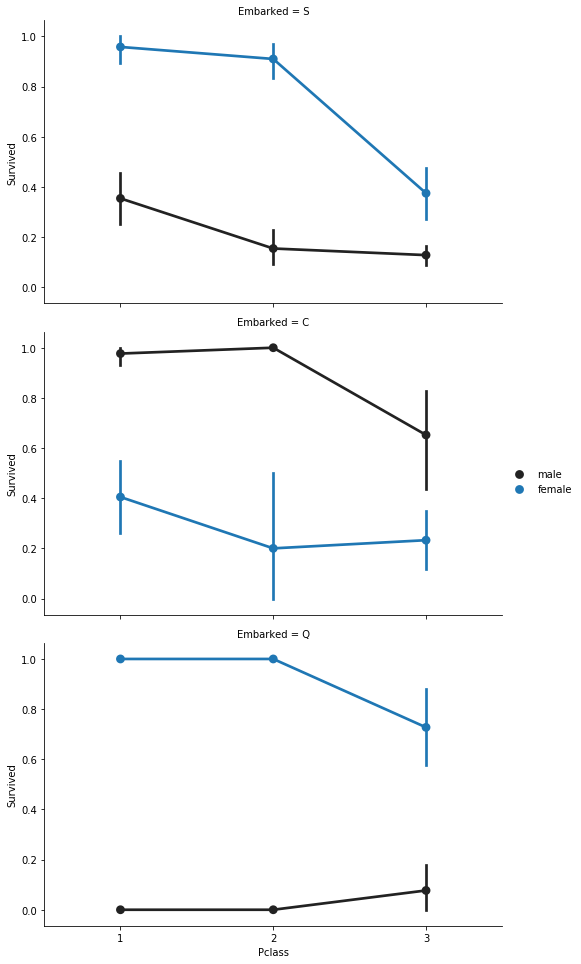

In [8]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order= None)
FacetGrid.add_legend()

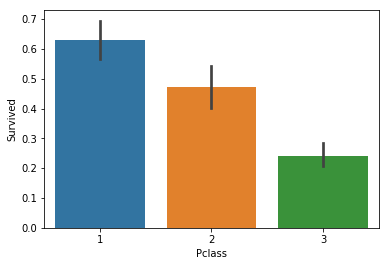

In [9]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

/home/karan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


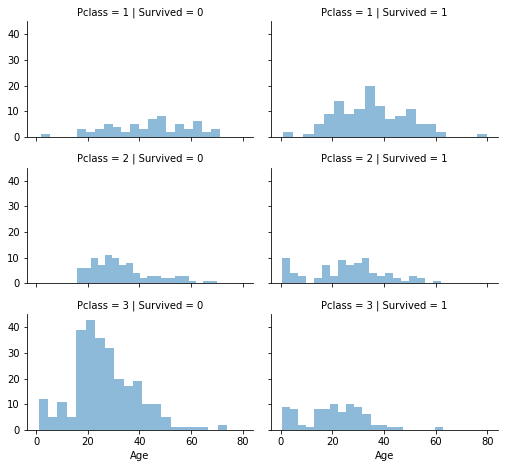

In [10]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [11]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

/home/karan/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


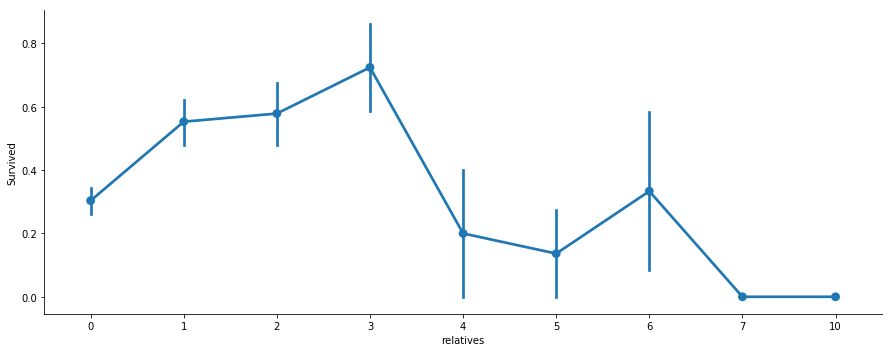

In [12]:
axes = sns.factorplot('relatives', 'Survived', data=train_df, aspect=2.5)

In [13]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [14]:
import re
deck = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [15]:
data = [train_df, test_df]
for dataset in data:
    med = train_df['Age'].median()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(med-std, med+std, size = is_null)
    age_slice = dataset['Age'].copy()#array of values
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['Age'].isnull().sum()

0

In [16]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
com_val = 'S'
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(com_val)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [19]:
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [20]:
data = [train_df, test_df]
titles = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev',
                                                'Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

title = pd.get_dummies(train_df['Title'])
train_df = pd.concat([train_df,title],axis=1)

title = pd.get_dummies(test_df['Title'])
test_df = pd.concat([test_df,title],axis=1)
#dataset['Title'] = dataset['Title'].map(titles)
#dataset['Title'] = dataset['Title'].fillna(0)
#dataset = dataset.drop(['Name'], axis=1)

train_df = train_df.drop(['Name','Title'],axis=1)
test_df = test_df.drop(['Name','Title'],axis=1)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
Master       891 non-null uint8
Miss         891 non-null uint8
Mr           891 non-null uint8
Mrs          891 non-null uint8
Rare         891 non-null uint8
C            891 non-null uint8
Q            891 non-null uint8
S            891 non-null uint8
dtypes: int64(10), uint8(8)
memory usage: 76.6 KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
relatives      418 non-null int64
not_alone      418 non-null int64
Deck           418 non-null int64
Master         418 non-null uint8
Miss           418 non-null uint8
Mr             418 non-null uint8
Mrs            418 non-null uint8
Rare           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: int64(10), uint8(8)
memory usage: 36.0 KB


In [23]:
genders = {'male':0, "female":1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [24]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [25]:
train_df = train_df.drop(['Ticket'],axis=1)
test_df = test_df.drop(['Ticket'],axis=1)

In [26]:
embarked = pd.get_dummies(train_df['Embarked'])
train_df = pd.concat([train_df,embarked],axis=1)

embarked = pd.get_dummies(test_df['Embarked'])
test_df = pd.concat([test_df,embarked],axis=1)
#dataset['Title'] = dataset['Title'].map(titles)
#dataset['Title'] = dataset['Title'].fillna(0)
#dataset = dataset.drop(['Name'], axis=1)

train_df = train_df.drop(['Embarked'],axis=1)
test_df = test_df.drop(['Embarked'],axis=1)

In [43]:
dataset.loc[dataset['Age'] <=11, 'Age'] 

21      9
55     10
80      6
89      2
117     1
140    10
161     7
192    11
194     8
196     6
201     0
203     8
250     0
263     1
281     0
283     9
284     2
296     1
307     0
354     0
379     5
389     6
409     3
Name: Age, dtype: int64

In [45]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11, 'Age'] = 0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age'] <=18), 'Age'] = 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age'] <=22), 'Age'] = 2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age'] <=27), 'Age'] = 3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age'] <=33), 'Age'] = 4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age'] <=40), 'Age'] = 5
    dataset.loc[dataset['Age'] >40, 'Age'] = 6
train_df['Age'].value_counts()

4    161
6    152
5    147
3    139
2    116
1    108
0     68
Name: Age, dtype: int64

In [46]:
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[dataset['Fare'] <=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] >7.91) & (dataset['Fare'] <=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] >14.454) & (dataset['Fare'] <=31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] >31) & (dataset['Fare'] <=99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] >99) & (dataset['Fare'] <=250), 'Fare'] = 4
    #dataset.loc[(dataset['Fare'] >33) & (dataset['Fare'] <=40), 'Fare'] = 5
    dataset.loc[dataset['Fare'] >250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [48]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class'] = dataset['Age']*dataset['Pclass']
    
for dataset in data:
    dataset['FPP'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['FPP'] = dataset['FPP'].astype(int)

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
Master       891 non-null uint8
Miss         891 non-null uint8
Mr           891 non-null uint8
Mrs          891 non-null uint8
Rare         891 non-null uint8
C            891 non-null uint8
Q            891 non-null uint8
S            891 non-null uint8
Age_Class    891 non-null int64
FPP          891 non-null int64
dtypes: int64(12), uint8(8)
memory usage: 90.6 KB


In [50]:
train_df.head(10)

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  relatives  not_alone  Deck  \
0         0       3    0    2      1      0     0          1          0     8   
1         1       1    1    5      1      0     3          1          0     3   
2         1       3    1    3      0      0     0          0          1     8   
3         1       1    1    5      1      0     3          1          0     3   
4         0       3    0    5      0      0     1          0          1     8   
5         0       3    0    5      0      0     1          0          1     8   
6         0       1    0    6      0      0     3          0          1     5   
7         0       3    0    0      3      1     2          4          0     8   
8         1       3    1    3      0      2     1          2          0     8   
9         1       2    1    1      1      0     2          1          0     8   

   Master  Miss  Mr  Mrs  Rare  C  Q  S  Age_Class  FPP  
0       0     0   1    0     0  0  0  1          6    0  
1       0     0   0    1     0  1  0  0          5    1  
2       0     1   0    0     0  0  0  1          9    0  
3       0     0   0    1     0  0  0  1          5    1  
4       0     0   1    0     0  0  0  1         15    1  
5       0     0   1    0     0  0  1  0         15    1  
6       0     0   1    0     0  0  0  1          6    3  
7       1     0   0    0     0  0  0  1          0    0  
8       0     0   0    1     0  0  0  1          9    0  
9       0     0   0    1     0  1  0  0          2    1

In [51]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop("PassengerId", axis=1).copy()

In [67]:
sgd = linear_model.SGDClassifier(max_iter=10, tol=None)
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
#sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)

/home/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [68]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
#random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100,2)

/home/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)

In [71]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)

In [72]:
perceptron = Perceptron(max_iter = 5)
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)

/home/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [73]:
linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)

/home/karan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)

In [79]:
results = pd.DataFrame(
{
    'Model': ['SVM', 'KNN', "Log Reg", "Random Forest", "Naive Bayes", "Perceptron", "SGD", "Decision Tree"],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]
})

results_df = results.sort_values(by='Score',ascending=False)
results_df = results_df.set_index('Score')
results_df

Model
Score               
92.48  Random Forest
92.48  Decision Tree
86.08            KNN
83.84        Log Reg
83.39            SVM
82.60     Perceptron
80.58    Naive Bayes
62.63            SGD

In [84]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:",scores.std())

Scores: [0.74444444 0.82222222 0.7752809  0.83146067 0.86516854 0.86516854
 0.79775281 0.7752809  0.85393258 0.85227273]
Mean: 0.8182984337759619
Standard Deviation: 0.04072327421990861
Tue Nov 26 21:26:13 2019
Tue Nov 26 21:26:23 2019
Tue Nov 26 21:26:33 2019
Tue Nov 26 21:26:43 2019
Tue Nov 26 21:26:53 2019
Tue Nov 26 21:27:03 2019
Tue Nov 26 21:27:13 2019
Tue Nov 26 21:27:23 2019
Tue Nov 26 21:27:33 2019
Tue Nov 26 21:27:43 2019
Tue Nov 26 21:27:53 2019


In [81]:
imp = pd.DataFrame({'features':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
imp = imp.sort_values('importance',ascending=False).set_index('features')
imp

importance
features             
Mr              0.149
Sex             0.130
Age_Class       0.094
Deck            0.081
Pclass          0.077
Age             0.072
Fare            0.063
relatives       0.061
Miss            0.047
SibSp           0.045
FPP             0.043
Mrs             0.035
Parch           0.022
S               0.021
C               0.019
not_alone       0.012
Q               0.011
Master          0.011
Rare            0.008

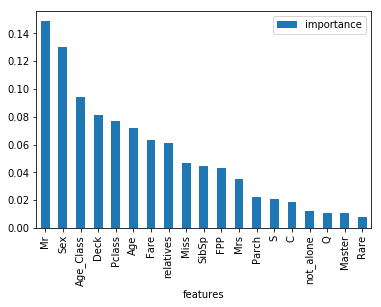

In [82]:
imp.plot.bar()

In [85]:
train_df = train_df.drop(['not_alone','Parch'],axis=1)
test_df = test_df.drop(['not_alone','Parch'],axis=1)

Tue Nov 26 21:32:13 2019
Tue Nov 26 21:32:23 2019


In [86]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print(round(acc_random_forest,2),"%")

92.48 %
Tue Nov 26 21:47:33 2019
Tue Nov 26 21:47:43 2019


In [87]:
print("oob score:", round(random_forest.oob_score_,4)*100,"%")

oob score: 81.26 %
Tue Nov 26 21:48:43 2019
Tue Nov 26 21:48:53 2019
Tue Nov 26 21:49:03 2019
Tue Nov 26 21:49:13 2019
Tue Nov 26 21:49:23 2019
Tue Nov 26 21:49:33 2019
Tue Nov 26 21:49:43 2019
Tue Nov 26 21:49:53 2019
Tue Nov 26 21:50:03 2019
Tue Nov 26 21:50:13 2019
Tue Nov 26 21:50:23 2019
Tue Nov 26 21:50:33 2019
Tue Nov 26 21:50:43 2019
Tue Nov 26 21:50:53 2019
Tue Nov 26 21:51:03 2019
Tue Nov 26 21:51:13 2019
Tue Nov 26 21:51:23 2019
Tue Nov 26 21:51:33 2019
Tue Nov 26 21:51:43 2019
Tue Nov 26 21:51:53 2019
Tue Nov 26 21:52:03 2019
Tue Nov 26 21:52:13 2019
Tue Nov 26 21:52:23 2019
Tue Nov 26 21:52:33 2019
Tue Nov 26 21:52:43 2019
Tue Nov 26 21:52:53 2019
Tue Nov 26 21:53:03 2019


In [88]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "min_samples_leaf" : [1,5,10,25,50,70],
    "min_samples_split": [2,4,10,12,16,18,25,35],
    "n_estimators": [50,100,150,200,400,700]
}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs = -1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)
clf.bestparams

/home/karan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Tue Nov 26 21:58:13 2019
Tue Nov 26 21:58:23 2019
Tue Nov 26 21:58:33 2019
Tue Nov 26 21:58:43 2019
Tue Nov 26 21:58:53 2019
Tue Nov 26 21:59:03 2019
Tue Nov 26 21:59:13 2019
Tue Nov 26 21:59:23 2019
Tue Nov 26 21:59:33 2019
Tue Nov 26 21:59:43 2019
Tue Nov 26 21:59:53 2019
Tue Nov 26 22:00:03 2019


AttributeError: 'GridSearchCV' object has no attribute 'bestparams'

Tue Nov 26 22:00:13 2019
Tue Nov 26 22:00:23 2019
Tue Nov 26 22:00:33 2019


In [89]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 50}

In [90]:
RandomForestClassifier?

Tue Nov 26 22:02:33 2019
Tue Nov 26 22:02:43 2019
Tue Nov 26 22:02:53 2019


In [91]:
final_model = RandomForestClassifier(criterion="gini",n_estimators=50,min_samples_leaf=1,min_samples_split=18, 
                                     max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
final_model.fit(X_train, Y_train)

print("oob score:", round(final_model.oob_score_, 4)*100,"%")

oob score: 84.06 %
Tue Nov 26 22:03:53 2019
Tue Nov 26 22:04:03 2019
Tue Nov 26 22:04:13 2019
Tue Nov 26 22:04:23 2019
Tue Nov 26 22:04:33 2019
Tue Nov 26 22:04:43 2019
Tue Nov 26 22:04:53 2019
Tue Nov 26 22:05:03 2019
Tue Nov 26 22:05:13 2019
Tue Nov 26 22:05:23 2019
Tue Nov 26 22:05:33 2019


In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(final_model, X_train, Y_train, cv=5)
(tn, fp, fn, tp) = confusion_matrix(Y_train, predictions).ravel()
(tn, fp, fn, tp)

Tue Nov 26 22:10:13 2019


(494, 55, 90, 252)

In [106]:
features = list(X_train.columns)
#features = np.array(features)

Tue Nov 26 22:28:03 2019


In [97]:
#from sklearn.metrics import precision_score, recall_score

print("precision: ",(tp/(tp+fp)))
print("recall: ", (tp/(tp+fn)))

precision:  0.8208469055374593
recall:  0.7368421052631579
Tue Nov 26 22:12:33 2019
Tue Nov 26 22:12:43 2019
Tue Nov 26 22:12:53 2019


In [98]:
p = tp/(tp+fp)
r = tp/(tp+fn)
print("f1 score: ", (2*p*r)/(p+r))

f1 score:  0.7765793528505393
Tue Nov 26 22:13:53 2019


In [117]:
final_model.estimators_[6]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=18,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1298508491, splitter='best')

Tue Nov 26 22:31:13 2019


In [119]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
!pip install pydotplus
import pydotplus

    100% |████████████████████████████████| 286kB 3.2MB/s ta 0:00:01
  Stored in directory: /home/karan/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Tue Nov 26 22:39:23 2019


In [127]:
dot_data = StringIO()
tree = final_model.estimators_[5]
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                feature_names=features, class_names=['Survived', 'Not Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png = ('/home/karan/Cornell/ds/titanic/tree.png')
Image(graph.create_png())

Tue Nov 26 22:50:53 2019


InvocationException: GraphViz's executables not found

In [128]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [129]:
Image(graph.create_jpg())

FileNotFoundError: [Errno 2] "dot" not found in path.

Tue Nov 26 22:51:04 2019


In [131]:
!pwd

/home/karan/Cornell/ds/titanic
Tue Nov 26 22:52:04 2019


In [136]:
from sklearn.tree import export_graphviz
import pydot

tree = final_model.estimators_[6]
export_graphviz(tree, out_file='/home/karan/Cornell/ds/titanic/tree.dot',feature_names=features, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png');

Tue Nov 26 23:01:34 2019
Tue Nov 26 23:01:44 2019
Tue Nov 26 23:01:54 2019
Tue Nov 26 23:02:04 2019
Tue Nov 26 23:02:14 2019
Tue Nov 26 23:02:24 2019
Tue Nov 26 23:02:34 2019
Tue Nov 26 23:02:44 2019
Tue Nov 26 23:02:54 2019
Tue Nov 26 23:03:04 2019
Tue Nov 26 23:03:14 2019
Tue Nov 26 23:03:24 2019
Tue Nov 26 23:03:34 2019
Tue Nov 26 23:03:44 2019
Tue Nov 26 23:03:54 2019
Tue Nov 26 23:04:04 2019
Tue Nov 26 23:04:14 2019
Tue Nov 26 23:04:24 2019
Tue Nov 26 23:04:34 2019
Tue Nov 26 23:04:44 2019
Tue Nov 26 23:04:54 2019
Tue Nov 26 23:05:04 2019
Tue Nov 26 23:05:14 2019
Tue Nov 26 23:05:24 2019
Tue Nov 26 23:05:34 2019
Tue Nov 26 23:05:44 2019
Tue Nov 26 23:05:54 2019
Tue Nov 26 23:06:04 2019
Tue Nov 26 23:06:14 2019
Tue Nov 26 23:06:24 2019
Tue Nov 26 23:06:34 2019
Tue Nov 26 23:06:44 2019
Tue Nov 26 23:06:54 2019
Tue Nov 26 23:07:04 2019
Tue Nov 26 23:07:14 2019
Tue Nov 26 23:07:24 2019
Tue Nov 26 23:07:34 2019
Tue Nov 26 23:07:44 2019
Tue Nov 26 23:07:54 2019
Tue Nov 26 23:08:04 2019


In [134]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot','-o','tree.png','-Gdpi=600'])

Tue Nov 26 23:00:14 2019


0

Tue Nov 26 23:00:24 2019


In [135]:
Image(filename='tree.png')

Tue Nov 26 23:01:04 2019
Tue Nov 26 23:01:14 2019
Tue Nov 26 23:01:24 2019


In [111]:
(graph, ) = pydot.graph_from_dot_file('/home/karan/Cornell/ds/titanic/tree.dot')

Tue Nov 26 22:29:43 2019


In [113]:
graph.write_png('tree.png');

FileNotFoundError: [Errno 2] "dot" not found in path.

Tue Nov 26 22:30:13 2019
Tue Nov 26 22:30:23 2019
Tue Nov 26 22:30:33 2019


In [116]:
graph.get_attributes()

{}

Tue Nov 26 22:30:53 2019
Tue Nov 26 22:31:03 2019


In [126]:
!pip install graphviz

In [137]:
from sklearn.metrics import precision_recall_curve

y_scores = final_model.predict_proba(X_train)


In [141]:
precision, recall, threshold = precision_recall_curve(Y_train, y_scores[:,1])

Tue Nov 26 23:39:54 2019


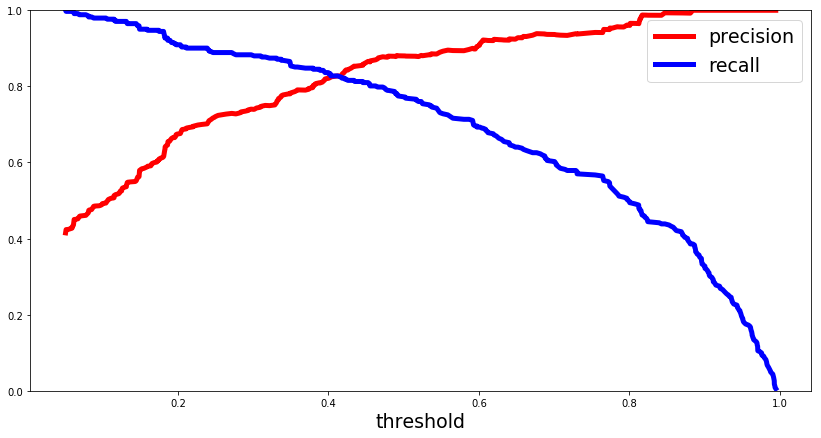

Tue Nov 26 23:42:44 2019


In [142]:
def plot_precision_and_recall(precision, recall,threshold):
    plt.plot(threshold, precision[:-1],"r-",label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold",fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0,1])
plt.figure(figsize=(14,7))
plot_precision_and_recall(precision,recall,threshold)
plt.show()

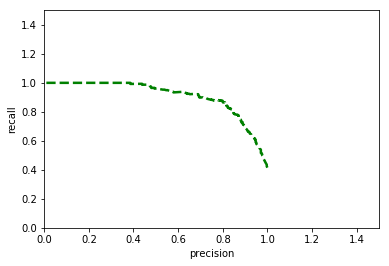

Tue Nov 26 23:50:04 2019
Tue Nov 26 23:50:14 2019
Tue Nov 26 23:50:24 2019
Tue Nov 26 23:50:34 2019
Tue Nov 26 23:50:44 2019
Tue Nov 26 23:50:54 2019
Tue Nov 26 23:51:04 2019
Tue Nov 26 23:51:14 2019
Tue Nov 26 23:51:24 2019
Tue Nov 26 23:51:34 2019
Tue Nov 26 23:51:44 2019
Tue Nov 26 23:51:54 2019
Tue Nov 26 23:52:04 2019
Tue Nov 26 23:52:14 2019
Tue Nov 26 23:52:24 2019
Tue Nov 26 23:52:34 2019
Tue Nov 26 23:52:44 2019
Tue Nov 26 23:52:54 2019
Tue Nov 26 23:53:04 2019
Tue Nov 26 23:53:14 2019
Tue Nov 26 23:53:24 2019
Tue Nov 26 23:53:34 2019
Tue Nov 26 23:53:44 2019
Tue Nov 26 23:53:54 2019


In [143]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall")
    plt.xlabel("precision")
    plt.axis([0,1.5,0,1.5])
plt.figure()
plot_precision_vs_recall(precision, recall)
plt.show()

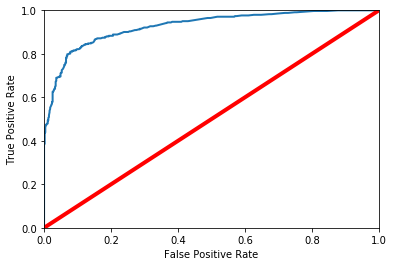

Wed Nov 27 00:18:04 2019
Wed Nov 27 00:18:14 2019
Wed Nov 27 00:18:24 2019
Wed Nov 27 00:18:34 2019
Wed Nov 27 00:18:44 2019
Wed Nov 27 00:18:54 2019
Wed Nov 27 00:19:04 2019
Wed Nov 27 00:19:14 2019
Wed Nov 27 00:19:24 2019
Wed Nov 27 00:19:34 2019
Wed Nov 27 00:19:44 2019
Wed Nov 27 00:19:54 2019
Wed Nov 27 00:20:04 2019
Wed Nov 27 00:20:14 2019
Wed Nov 27 00:20:24 2019
Wed Nov 27 00:20:34 2019
Wed Nov 27 00:20:44 2019
Wed Nov 27 00:20:54 2019
Wed Nov 27 00:21:04 2019


In [145]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_train, y_scores[:,1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plt.figure()
plot_roc_curve(fpr, tpr)
plt.show()

In [146]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores[:,1])
print("ROC-AUC-SCORE: ", r_a_score)

ROC-AUC-SCORE:  0.9278086686053323
Wed Nov 27 00:23:14 2019
Wed Nov 27 00:23:24 2019
Wed Nov 27 00:23:34 2019
Wed Nov 27 00:23:44 2019
Wed Nov 27 00:23:54 2019
Wed Nov 27 00:24:04 2019
Wed Nov 27 00:24:14 2019
Wed Nov 27 00:24:24 2019
Wed Nov 27 00:24:34 2019
Wed Nov 27 00:24:44 2019
Wed Nov 27 00:24:54 2019
Wed Nov 27 00:25:04 2019
Wed Nov 27 00:25:14 2019
Wed Nov 27 00:25:24 2019
Wed Nov 27 00:25:34 2019
Wed Nov 27 00:25:44 2019
Wed Nov 27 00:25:54 2019
Wed Nov 27 00:26:04 2019
Wed Nov 27 00:26:14 2019
Wed Nov 27 00:26:24 2019
Wed Nov 27 00:26:34 2019
Wed Nov 27 00:26:44 2019
Wed Nov 27 00:26:54 2019
Wed Nov 27 00:27:04 2019
Wed Nov 27 00:27:14 2019
Wed Nov 27 00:27:24 2019
Wed Nov 27 00:27:34 2019
Wed Nov 27 00:27:44 2019
Wed Nov 27 00:27:54 2019
Wed Nov 27 00:28:04 2019
Wed Nov 27 00:28:14 2019
Wed Nov 27 00:28:24 2019
Wed Nov 27 00:28:34 2019
Wed Nov 27 00:28:44 2019
Wed Nov 27 00:28:54 2019
Wed Nov 27 00:29:04 2019
Wed Nov 27 00:29:14 2019
Wed Nov 27 00:29:24 2019
Wed Nov 27 00:2

In [161]:
Y_pred = final_model.predict(X_test)
Y_pred


Y_pred = pd.DataFrame(Y_pred,index=None,columns=['Survived'])
Y_pred


res = pd.concat([test_df['PassengerId'],Y_pred],axis=1)
res

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Wed Nov 27 20:53:49 2019


In [165]:
!pwd

/home/karan/Cornell/ds/titanic
Wed Nov 27 20:55:49 2019
Wed Nov 27 20:55:59 2019
Wed Nov 27 20:56:09 2019


In [166]:
res.to_csv('/home/karan/Cornell/ds/titanic/result_test_rf.csv',index=False)